In [159]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [160]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [161]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [162]:
df['Date'] = pd.to_datetime(df['date'])

In [163]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [164]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [165]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [166]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [167]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [168]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [169]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [170]:
Ahm_Coo1= df[(df['city'] == 'Ahmd') & (df['product'] == 'coolers')]

In [171]:
Ahm_Coo1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,coolers,11-01-2017,Ahmd,46369
2017-12-01,coolers,12-01-2017,Ahmd,42806
2018-01-01,coolers,01-01-2018,Ahmd,907164
2018-02-01,coolers,02-01-2018,Ahmd,4961494
2018-03-01,coolers,03-01-2018,Ahmd,7403524


In [172]:
Ahm_Coo1.shape

(48, 4)

In [173]:
Ahm_Coo= Ahm_Coo1.drop('date', axis = 1)

In [174]:
Ahm_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Ahmd,4099496
2014-05-01,coolers,Ahmd,1293194
2014-06-01,coolers,Ahmd,37584
2014-07-01,coolers,Ahmd,0
2014-08-01,coolers,Ahmd,0


In [175]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

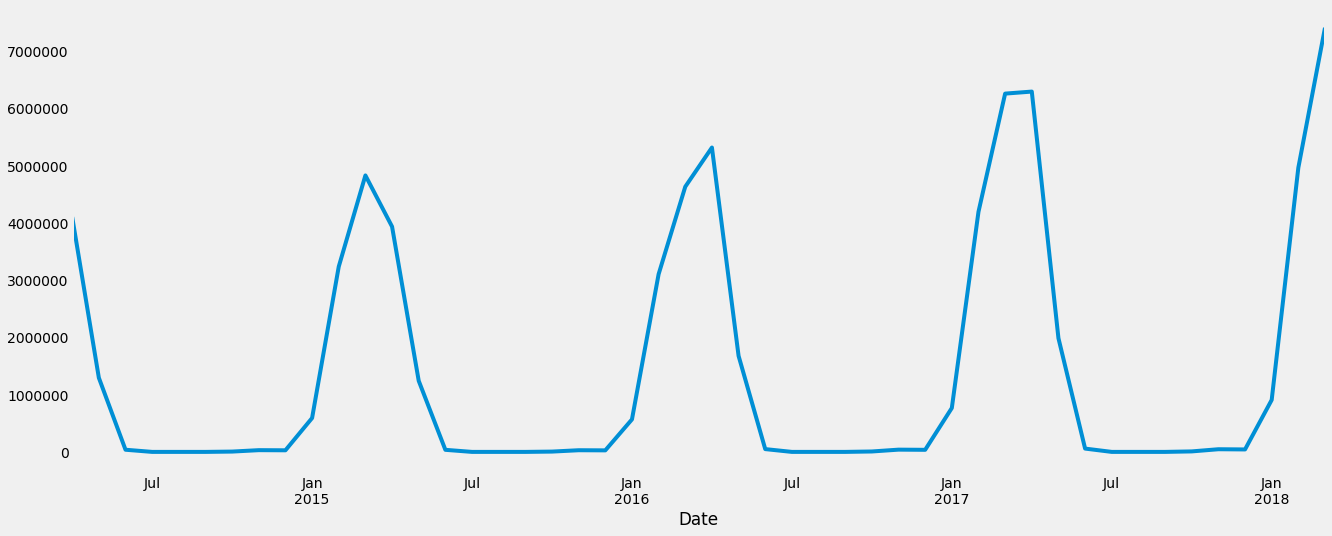

In [176]:
Ahm_Coo['sales'].plot()
plt.grid();

In [177]:
Ahm_Coo.sort_index(inplace= True)

In [178]:
Ahm_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Ahmd,4099496
2014-05-01,coolers,Ahmd,1293194
2014-06-01,coolers,Ahmd,37584
2014-07-01,coolers,Ahmd,0
2014-08-01,coolers,Ahmd,0


In [179]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

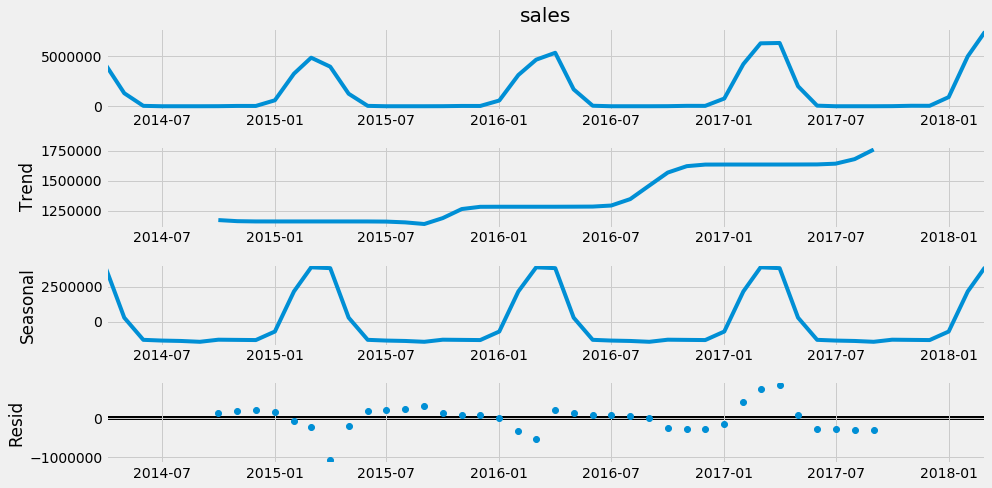

In [180]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ahm_Coo['sales'],model='additive')
decomposition.plot();

In [181]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.171786e+06
2014-11-01    1.162616e+06
2014-12-01    1.160353e+06
2015-01-01    1.160289e+06
2015-02-01    1.160289e+06
2015-03-01    1.160289e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    3.824511e+06
2014-05-01    2.796320e+05
2014-06-01   -1.306748e+06
2014-07-01   -1.358815e+06
2014-08-01   -1.387194e+06
2014-09-01   -1.446989e+06
2014-10-01   -1.297285e+06
2014-11-01   -1.310536e+06
2014-12-01   -1.322929e+06
2015-01-01   -7.118875e+05
2015-02-01    2.155553e+06
2015-03-01    3.882688e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    131063.906250
2014-11-01    178144.906250
2014-12-01    190

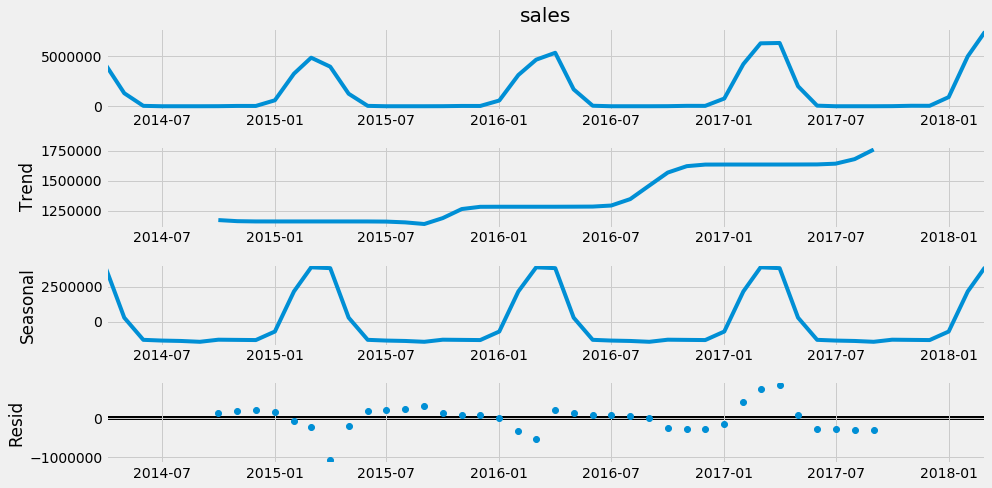

In [182]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ahm_Coo['sales'],model='Multiplicative')
decomposition.plot();

In [183]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.171786e+06
2014-11-01    1.162616e+06
2014-12-01    1.160353e+06
2015-01-01    1.160289e+06
2015-02-01    1.160289e+06
2015-03-01    1.160289e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    3.824511e+06
2014-05-01    2.796320e+05
2014-06-01   -1.306748e+06
2014-07-01   -1.358815e+06
2014-08-01   -1.387194e+06
2014-09-01   -1.446989e+06
2014-10-01   -1.297285e+06
2014-11-01   -1.310536e+06
2014-12-01   -1.322929e+06
2015-01-01   -7.118875e+05
2015-02-01    2.155553e+06
2015-03-01    3.882688e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    131063.906250
2014-11-01    178144.906250
2014-12-01    190

In [184]:
Ahm_Coo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [185]:
train    =   Ahm_Coo[0:int(len(Ahm_Coo)*0.7)] 
test     =  Ahm_Coo[int(len(Ahm_Coo)*0.7):]

In [186]:
train.shape

(33, 3)

In [187]:
test.shape

(15, 3)

In [188]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,coolers,Ahmd,4099496
2014-05-01,coolers,Ahmd,1293194
2014-06-01,coolers,Ahmd,37584
2014-07-01,coolers,Ahmd,0
2014-08-01,coolers,Ahmd,0


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,coolers,Ahmd,0
2016-09-01,coolers,Ahmd,0
2016-10-01,coolers,Ahmd,7212
2016-11-01,coolers,Ahmd,39169
2016-12-01,coolers,Ahmd,36159


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,coolers,Ahmd,766296
2017-02-01,coolers,Ahmd,4191053
2017-03-01,coolers,Ahmd,6253874
2017-04-01,coolers,Ahmd,6289270
2017-05-01,coolers,Ahmd,1983963


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,coolers,Ahmd,46369
2017-12-01,coolers,Ahmd,42806
2018-01-01,coolers,Ahmd,907164
2018-02-01,coolers,Ahmd,4961494
2018-03-01,coolers,Ahmd,7403524


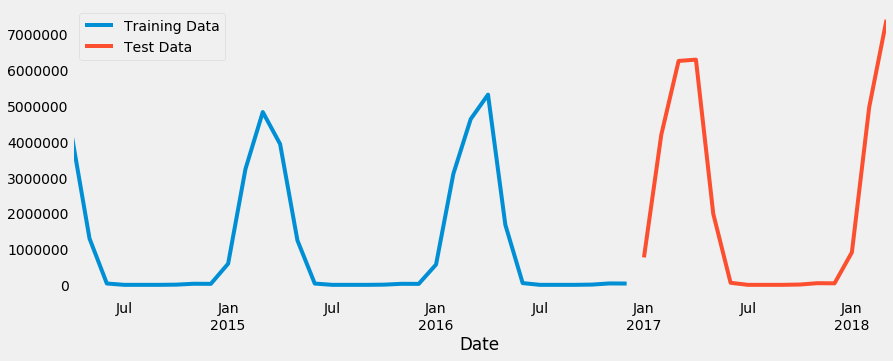

In [189]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [190]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [191]:
from sklearn import metrics

Simpleaverage

In [192]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [193]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,coolers,Ahmd,766296,1.055536e+06
2017-02-01,coolers,Ahmd,4191053,1.055536e+06
2017-03-01,coolers,Ahmd,6253874,1.055536e+06
2017-04-01,coolers,Ahmd,6289270,1.055536e+06
2017-05-01,coolers,Ahmd,1983963,1.055536e+06


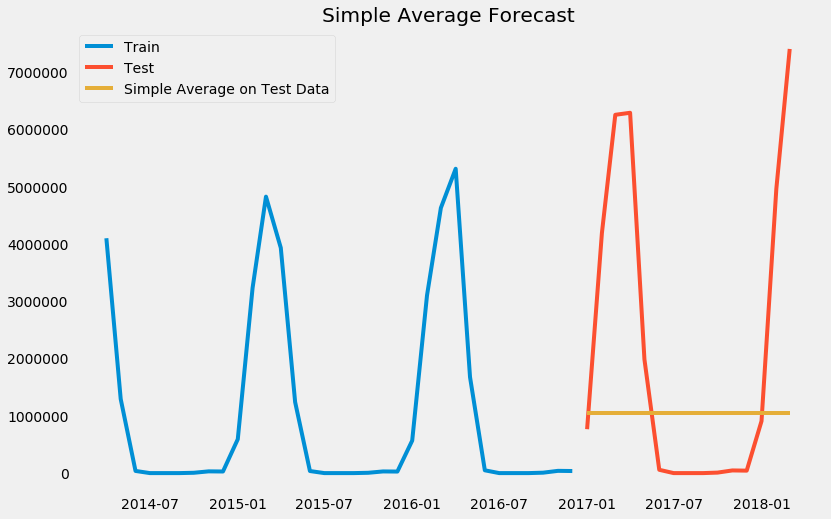

In [194]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [195]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 2923989.846


In [196]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,2.923990e+06


In [197]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [198]:
SES_train = train.copy()
SES_test = test.copy()

In [199]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [200]:
model_SES_autofit = model_SES.fit(optimized=True)

In [201]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 4099496.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [202]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,coolers,Ahmd,766296,36173.250174
2017-02-01,coolers,Ahmd,4191053,36173.250174
2017-03-01,coolers,Ahmd,6253874,36173.250174
2017-04-01,coolers,Ahmd,6289270,36173.250174
2017-05-01,coolers,Ahmd,1983963,36173.250174


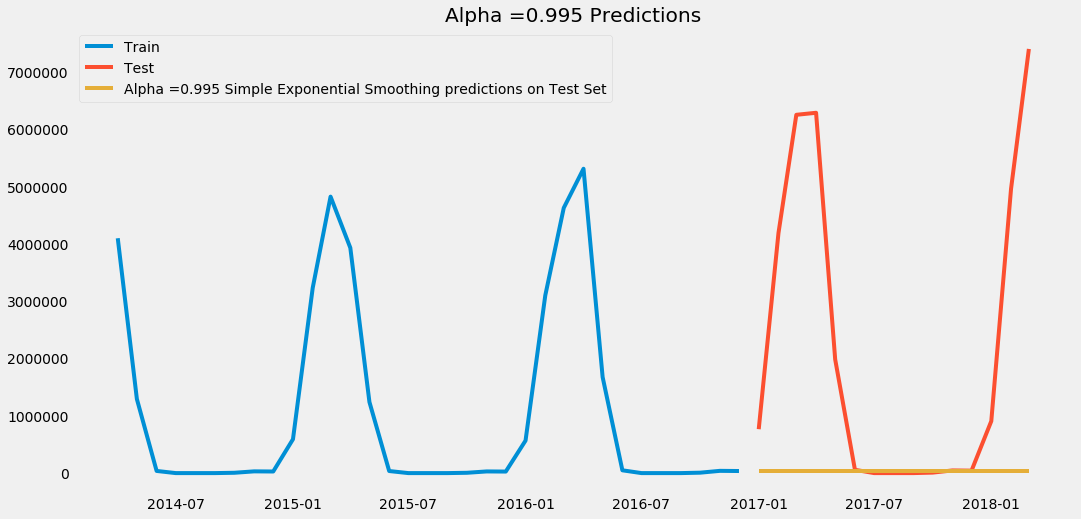

In [203]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [204]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 3451102.015


In [205]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [206]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: inf


In [207]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf


In [208]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [209]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [210]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,2.120190e+06,2.976228e+06
1,0.2,1.940748e+06,3.183014e+06
2,0.3,1.831872e+06,3.325279e+06
3,0.4,1.732185e+06,3.406989e+06
4,0.5,1.638882e+06,3.441066e+06
5,0.6,1.553241e+06,3.450846e+06
8,0.9,1.339666e+06,3.451127e+06
7,0.8,1.404255e+06,3.451549e+06
6,0.7,1.475259e+06,3.452090e+06


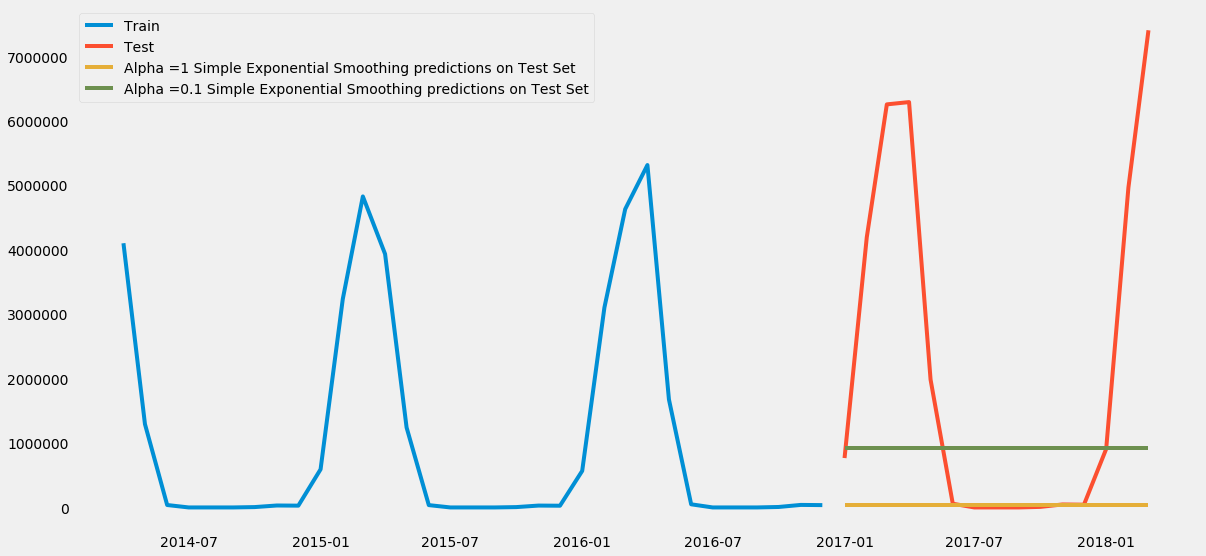

In [211]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [212]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1])
print('\nMAPE:',mape)


MAPE: inf


In [213]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf


Double

In [214]:
DES_train = train.copy()
DES_test = test.copy()

In [215]:
model_DES = Holt(DES_train['sales'])

In [216]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [217]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [218]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.096752e+07,3.190453e+06
1,0.1,0.2,7.871687e+06,5.242251e+06
2,0.1,0.3,6.613899e+06,3.842964e+06
3,0.1,0.4,5.748437e+06,8.404841e+06
4,0.1,0.5,5.170119e+06,9.221104e+06
...,...,...,...,...
95,1.0,0.6,1.433970e+06,3.454211e+06
96,1.0,0.7,1.433546e+06,3.433419e+06
97,1.0,0.8,1.435494e+06,3.437501e+06
98,1.0,0.9,1.441012e+06,3.449991e+06


In [219]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
56,0.6,0.7,1.843989e+06,2.901931e+06
49,0.5,1.0,2.026438e+06,2.906236e+06
8,0.1,0.9,4.436818e+06,2.915256e+06
57,0.6,0.8,1.854295e+06,2.921568e+06
55,0.6,0.6,1.840337e+06,2.940033e+06


In [220]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.6,0.8])
print('\nMAPE:',mape)


MAPE: inf


In [221]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf


In [222]:
TES_train = train.copy()
TES_test = test.copy()

In [223]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='additive',initialization_method='estimated')

In [224]:
model_TES_autofit = model_TES.fit()

In [225]:
model_TES_autofit.params

{'smoothing_level': 0.005,
 'smoothing_trend': 0.005,
 'smoothing_seasonal': 0.4975000000000001,
 'damping_trend': nan,
 'initial_level': 1165952.580555555,
 'initial_trend': -803.8979797979264,
 'initial_seasons': array([ 2770514.69444444,    78802.56944444, -1125464.55555556,
        -1160462.59722222, -1153957.72222222, -1140252.22222222,
        -1167616.68055556, -1133786.55555556, -1133846.63888889,
         -570373.76388889,  2072335.23611111,  3664108.23611111]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [226]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,coolers,Ahmd,766296,5.721381e+05
2017-02-01,coolers,Ahmd,4191053,3.161056e+06
2017-03-01,coolers,Ahmd,6253874,4.720643e+06
2017-04-01,coolers,Ahmd,6289270,4.632675e+06
2017-05-01,coolers,Ahmd,1983963,1.452941e+06


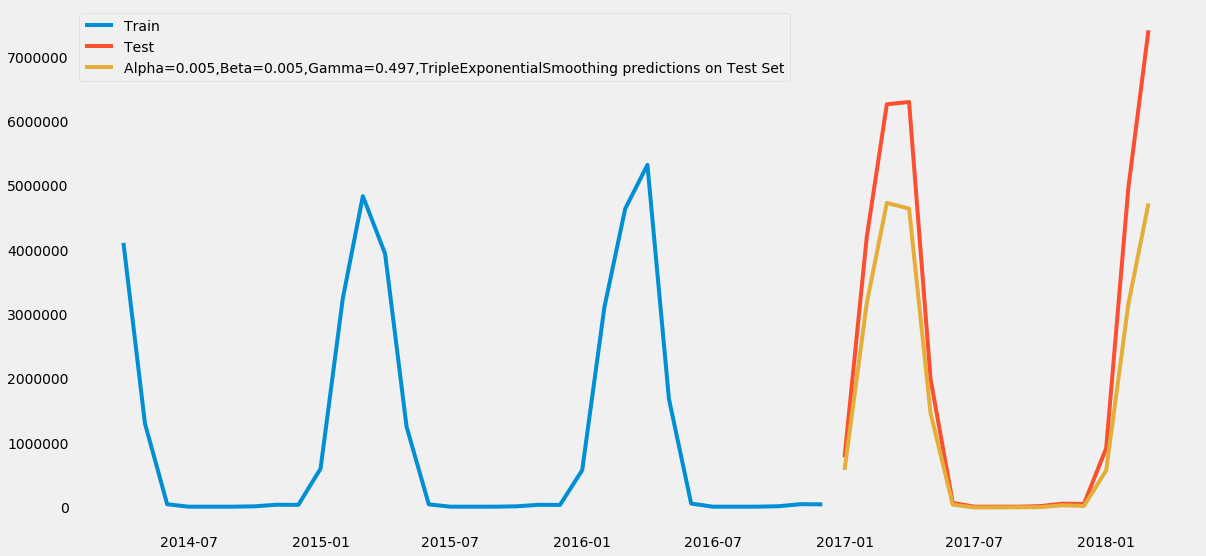

In [227]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [228]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.005,Beta=0.005,Gamma=0.497', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.005,Beta=0.005,Gamma=0.497', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1068287.734


In [229]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: inf


In [230]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf


In [231]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [232]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [233]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,264092.950090,1.022056e+06
1,0.1,0.1,0.2,262063.102250,1.006617e+06
2,0.1,0.1,0.3,260689.992817,9.933852e+05
3,0.1,0.1,0.4,259971.946763,9.821803e+05
4,0.1,0.1,0.5,259907.930946,9.728462e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,562303.644031,9.746122e+05
996,1.0,1.0,0.7,598066.144632,9.751891e+05
997,1.0,1.0,0.8,649096.216473,1.074841e+06
998,1.0,1.0,0.9,716769.358784,1.299897e+06


In [234]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
594,0.6,1.0,0.5,401752.262876,867521.384447
584,0.6,0.9,0.5,389840.701297,868548.590211
585,0.6,0.9,0.6,389029.618122,869810.993816
595,0.6,1.0,0.6,400861.086932,872029.295227
583,0.6,0.9,0.4,391651.658777,873490.176022


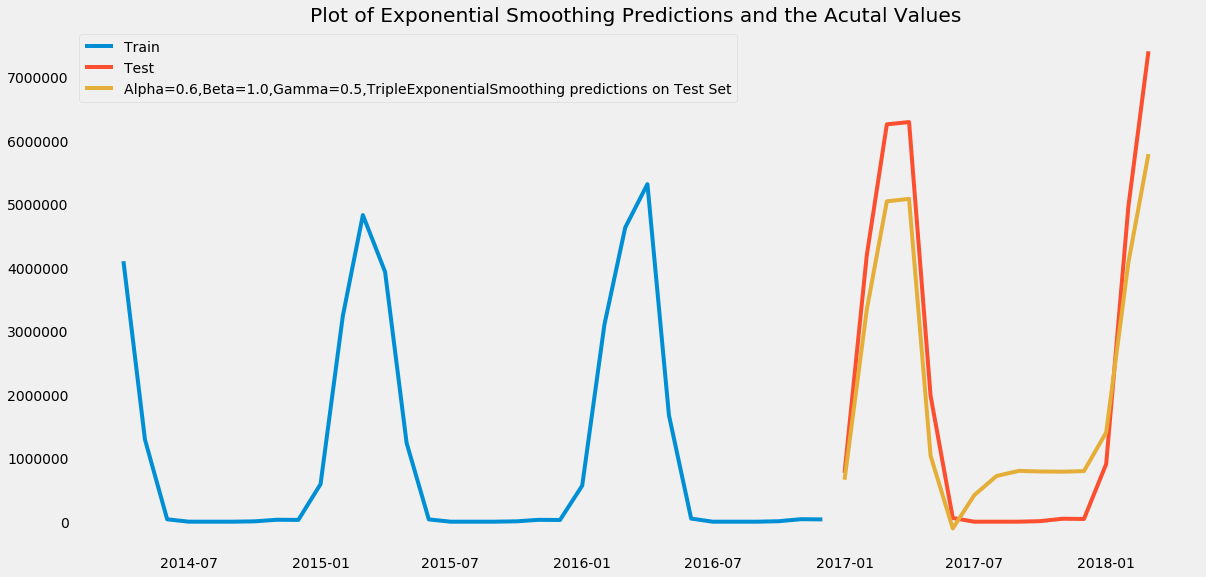

In [235]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.6000000000000000, 1.0000000000000000, 0.5], label='Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [236]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.6,1.0,0.5])
print('\nMAPE:',mape)


MAPE: inf


In [237]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf


In [238]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
Simple Average,2.923990e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf


In [239]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

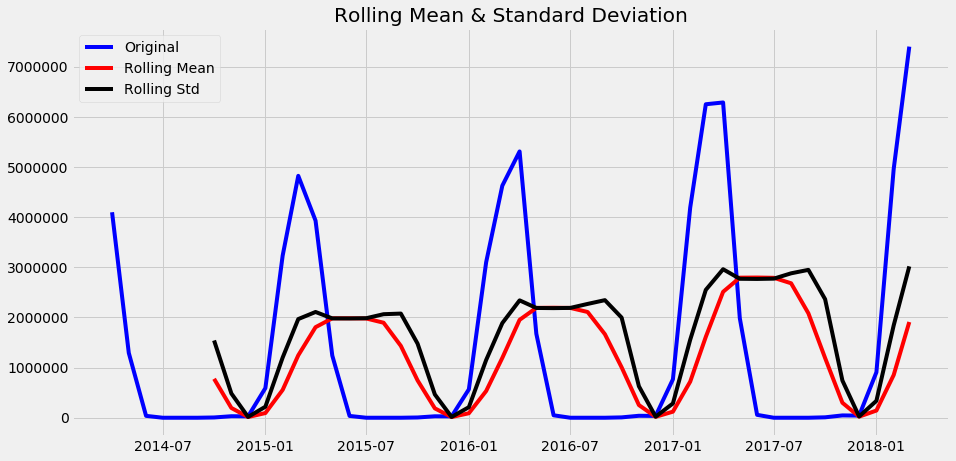

Results of Dickey-Fuller Test:
Test Statistic                 -0.547488
p-value                         0.882412
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [240]:
test_stationarity(Ahm_Coo['sales'])

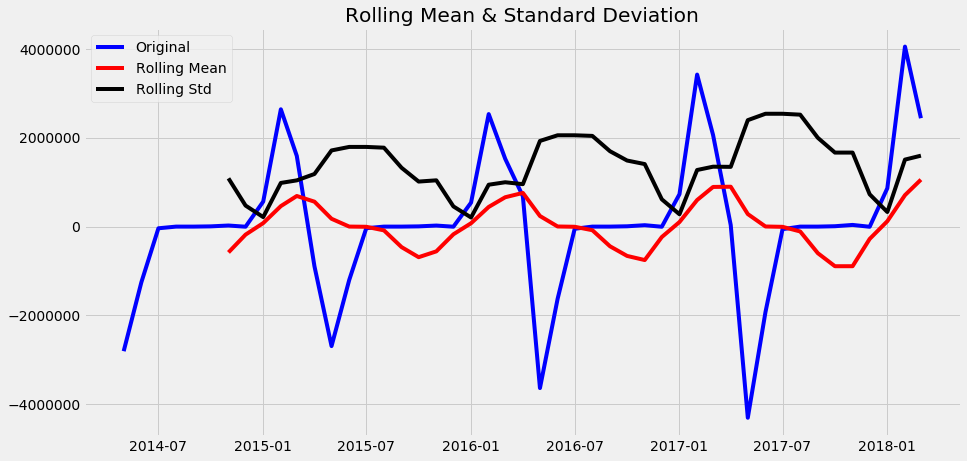

Results of Dickey-Fuller Test:
Test Statistic                -1.129507e+01
p-value                        1.350032e-20
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [241]:
test_stationarity(Ahm_Coo['sales'].diff().dropna())

In [242]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [243]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [245]:
from statsmodels.tsa.stattools import adfuller

In [247]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [248]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [249]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:993.8699215043614
ARIMA(0, 1, 1) - AIC:994.7613712123025
ARIMA(0, 1, 2) - AIC:993.5336458513344
ARIMA(0, 1, 3) - AIC:991.2622948756399
ARIMA(1, 1, 0) - AIC:996.6561989064219
ARIMA(1, 1, 1) - AIC:996.5427503673136
ARIMA(1, 1, 2) - AIC:990.0939004795694
ARIMA(1, 1, 3) - AIC:992.1730754255996
ARIMA(2, 1, 0) - AIC:996.0436005478086
ARIMA(2, 1, 1) - AIC:988.3740495352334
ARIMA(2, 1, 2) - AIC:990.1403801360102
ARIMA(2, 1, 3) - AIC:990.3812391865415
ARIMA(3, 1, 0) - AIC:996.0265560121425
ARIMA(3, 1, 1) - AIC:990.3732664424426
ARIMA(3, 1, 2) - AIC:991.5084129798304
ARIMA(3, 1, 3) - AIC:996.5167580311527


In [250]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
9,"(2, 1, 1)",988.374050
6,"(1, 1, 2)",990.093900
10,"(2, 1, 2)",990.140380
13,"(3, 1, 1)",990.373266
11,"(2, 1, 3)",990.381239


In [251]:
auto_ARIMA = ARIMA(train['sales'], order=(2,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -490.187
Date:                Fri, 20 Aug 2021   AIC                            988.374
Time:                        11:46:52   BIC                            994.237
Sample:                    04-01-2014   HQIC                           990.317
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9329      0.097      9.634      0.000       0.743       1.123
ar.L2         -0.3962      0.131     -3.030      0.002      -0.653      -0.140
ma.L1         -0.9999      0.180     -5.568      0.0

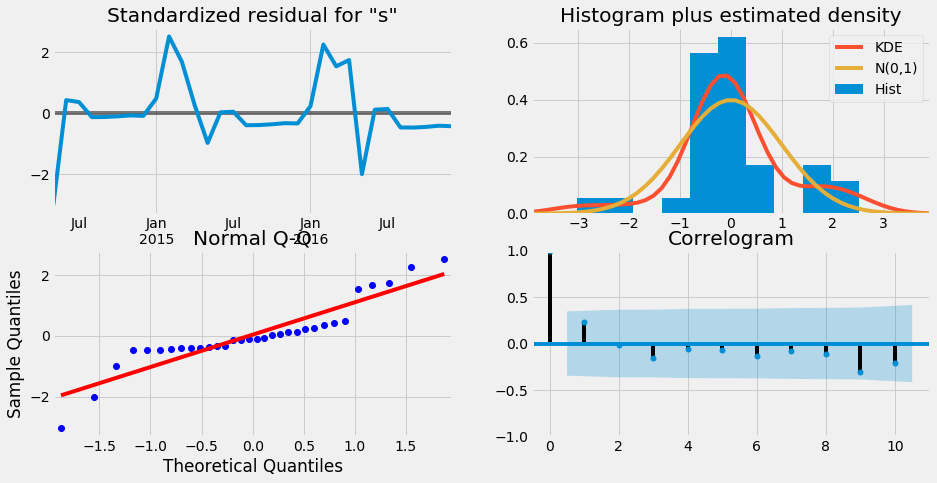

In [252]:
results_auto_ARIMA.plot_diagnostics();

In [253]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [254]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [255]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2963812.7787472294 
MAPE: inf


In [256]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"ARIMA(2,1,1)",inf,inf


In [257]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [258]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [259]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:796.7520574907622
SARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:597.2891590738942
SARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:408.50848464111226
SARIMA(0, 1, 0)x(0, 1, 3, 6)6 - AIC:223.0467942754777
SARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:578.9788733868919
SARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:582.3636507470605
SARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:407.7220496671115
SARIMA(0, 1, 0)x(1, 1, 3, 6)6 - AIC:224.89166860931817
SARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:413.32594074263125
SARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:416.98983026388197
SARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:409.57763290048166
SARIMA(0, 1, 0)x(2, 1, 3, 6)6 - AIC:226.89165560564734
SARIMA(0, 1, 0)x(3, 1, 0, 6)6 - AIC:51.13747037417948
SARIMA(0, 1, 0)x(3, 1, 1, 6)6 - AIC:54.64420105885008
SARIMA(0, 1, 0)x(3, 1, 2, 6)6 - AIC:257.8711950661751
SARIMA(0, 1, 0)x(3, 1, 3, 6)6 - AIC:228.89165690690726
SARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:759.1857550315008
SARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:561.9657509059708
SARIMA(0, 1, 1)x(0, 1

SARIMA(2, 1, 1)x(1, 1, 3, 6)6 - AIC:198.70249875188995
SARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:378.1053900020631
SARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:379.8705586476585
SARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:381.41554426507764
SARIMA(2, 1, 1)x(2, 1, 3, 6)6 - AIC:200.70249143605685
SARIMA(2, 1, 1)x(3, 1, 0, 6)6 - AIC:196.70248433638847
SARIMA(2, 1, 1)x(3, 1, 1, 6)6 - AIC:198.7024912034412
SARIMA(2, 1, 1)x(3, 1, 2, 6)6 - AIC:200.702548391219
SARIMA(2, 1, 1)x(3, 1, 3, 6)6 - AIC:202.7024937272455
SARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:723.3109199558273
SARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:535.3886154697763
SARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:350.72512747087967
SARIMA(2, 1, 2)x(0, 1, 3, 6)6 - AIC:168.77406998290235
SARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:562.53515744426
SARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:533.9508263369955
SARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:352.1598108634193
SARIMA(2, 1, 2)x(1, 1, 3, 6)6 - AIC:170.7740670477445
SARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:381.27186086452843
SARIMA(2, 1, 2)x(2, 1, 1

In [260]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
12,"(0, 1, 0)","(3, 1, 0, 6)",51.137470
13,"(0, 1, 0)","(3, 1, 1, 6)",54.644201
51,"(0, 1, 3)","(0, 1, 3, 6)",137.691833
115,"(1, 1, 3)","(0, 1, 3, 6)",138.543810
55,"(0, 1, 3)","(1, 1, 3, 6)",139.691830


In [261]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,1,0),
                                seasonal_order=(3,1,0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 6)   Log Likelihood                 -21.569
Date:                           Fri, 20 Aug 2021   AIC                             51.137
Time:                                   11:50:35   BIC                             51.455
Sample:                               04-01-2014   HQIC                            48.994
                                    - 12-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0000   6.33e-06  -1.58e+05      0.000      -1.000      -1.000
ar.S.L12      -8.2511   8.58e-05  -9.61e+04

In [262]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [263]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,7.662916e+05,3.586416,7.662846e+05,7.662986e+05
2017-02-01,4.191049e+06,5.071958,4.191039e+06,4.191059e+06
2017-03-01,6.253866e+06,6.211855,6.253853e+06,6.253878e+06
2017-04-01,-6.077589e+06,7.172832,-6.077603e+06,-6.077575e+06
2017-05-01,-1.917192e+06,8.019470,-1.917208e+06,-1.917176e+06


In [264]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 31898485183757.203 
MAPE: inf


In [265]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(3,1,0)6'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",3.189849e+13,inf


In [266]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
Simple Average,2.923990e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"SARIMA(0,1,0)(3,1,0)6",3.189849e+13,inf
"ARIMA(2,1,1)",inf,inf


In [267]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [268]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [269]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:552.6521625070783
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:198.9634820978911
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:47.83145175773883
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:199.91920506517403
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.2990341574881
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:172.2977325825216
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:236.38249955910663
SARIMA(0, 1

SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:115.42887258428789
SARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:167.66944077530889
SARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:115.97008366435762
SARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
SARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:494.0643011514792
SARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:203.14541662965857
SARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0
SARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:147.96008857413867
SARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:149.96074941722077


In [271]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
2,"(0, 1, 0)","(0, 1, 2, 12)",6.0
8,"(0, 1, 0)","(2, 1, 0, 12)",6.0
9,"(0, 1, 0)","(2, 1, 1, 12)",8.0
66,"(1, 1, 0)","(0, 1, 2, 12)",8.0
24,"(0, 1, 1)","(2, 1, 0, 12)",8.0


In [272]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Fri, 20 Aug 2021   AIC                              6.000
Time:                                         11:52:29   BIC                                nan
Sample:                                     04-01-2014   HQIC                               nan
                                          - 12-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0        

In [273]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [274]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,576575.0,404001.118325,-2.152526e+05,1.368403e+06
2017-02-01,3111431.0,571343.860750,1.991618e+06,4.231244e+06
2017-03-01,4638242.0,699750.463254,3.266756e+06,6.009728e+06
2017-04-01,5322042.0,808002.236651,3.738387e+06,6.905697e+06
2017-05-01,1685281.0,903373.963562,-8.529943e+04,3.455861e+06


In [275]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1061537039036.4 
MAPE: inf


In [276]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",3.189849e+13,inf
"SARIMA(0,1,0)(0,1,2)12",1.061537e+12,inf


In [277]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [278]:
Ahm_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Ahmd,4099496
2014-05-01,coolers,Ahmd,1293194
2014-06-01,coolers,Ahmd,37584
2014-07-01,coolers,Ahmd,0
2014-08-01,coolers,Ahmd,0


In [279]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Ahm_Coo1['date'])
df_prophet['y'] = Ahm_Coo1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,46369
2017-12-01,2017-12-01,42806
2018-01-01,2018-01-01,907164
2018-02-01,2018-02-01,4961494
2018-03-01,2018-03-01,7403524


In [280]:
df_prophet.shape

(48, 2)

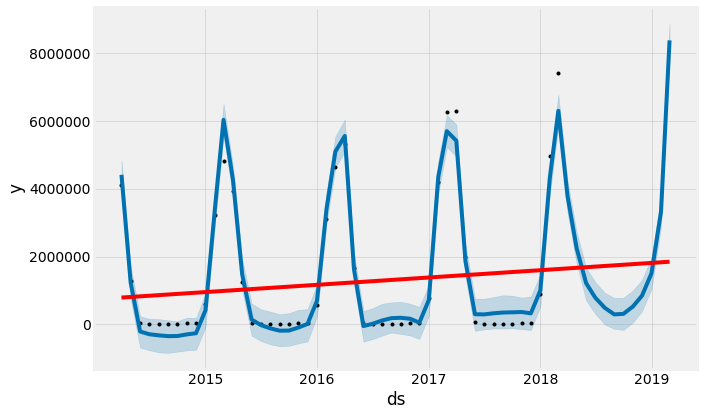

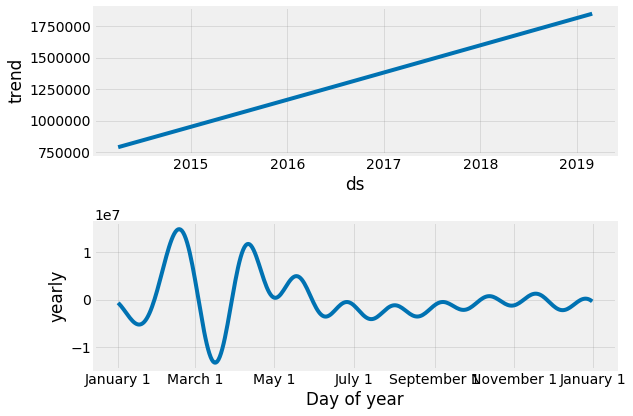

In [281]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [282]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,7.908662e+05,3.953507e+06,4.832785e+06,7.908662e+05,7.908662e+05,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,0.0,0.0,0.0,4.408742e+06
1,2014-05-01,8.084607e+05,7.417671e+05,1.722411e+06,8.084607e+05,8.084607e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,0.0,0.0,0.0,1.234373e+06
2,2014-06-01,8.266417e+05,-6.861362e+05,2.402308e+05,8.266417e+05,8.266417e+05,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,0.0,0.0,0.0,-2.094559e+05
3,2014-07-01,8.442362e+05,-7.617742e+05,1.660665e+05,8.442362e+05,8.442362e+05,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,0.0,0.0,0.0,-2.904294e+05
4,2014-08-01,8.624172e+05,-8.262592e+05,1.572232e+05,8.624172e+05,8.624172e+05,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,0.0,0.0,0.0,-3.229639e+05
5,2014-09-01,8.805982e+05,-8.385688e+05,1.212746e+05,8.805982e+05,8.805982e+05,-1.227368e+06,-1.227368e+06,-1.227368e+06,-1.227368e+06,-1.227368e+06,-1.227368e+06,0.0,0.0,0.0,-3.467702e+05
6,2014-10-01,8.981927e+05,-8.057608e+05,9.486673e+04,8.981927e+05,8.981927e+05,-1.241363e+06,-1.241363e+06,-1.241363e+06,-1.241363e+06,-1.241363e+06,-1.241363e+06,0.0,0.0,0.0,-3.431705e+05
7,2014-11-01,9.163737e+05,-7.679781e+05,1.987118e+05,9.163737e+05,9.163737e+05,-1.211368e+06,-1.211368e+06,-1.211368e+06,-1.211368e+06,-1.211368e+06,-1.211368e+06,0.0,0.0,0.0,-2.949947e+05
8,2014-12-01,9.339682e+05,-7.494837e+05,1.907808e+05,9.339682e+05,9.339682e+05,-1.194435e+06,-1.194435e+06,-1.194435e+06,-1.194435e+06,-1.194435e+06,-1.194435e+06,0.0,0.0,0.0,-2.604672e+05
9,2015-01-01,9.521491e+05,-8.622841e+04,9.146977e+05,9.521491e+05,9.521491e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,0.0,0.0,0.0,4.177321e+05


In [283]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

912703959888.8917


In [284]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",3.189849e+13,inf
"SARIMA(0,1,0)(0,1,2)12",1.061537e+12,inf
Prophet,9.127040e+11,NaN


In [285]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
Simple Average,2.923990e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
Prophet,9.127040e+11,NaN
"SARIMA(0,1,0)(0,1,2)12",1.061537e+12,inf
"SARIMA(0,1,0)(3,1,0)6",3.189849e+13,inf
"ARIMA(2,1,1)",inf,inf


In [286]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [287]:
Ahm_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Ahmd,4099496
2014-05-01,coolers,Ahmd,1293194
2014-06-01,coolers,Ahmd,37584
2014-07-01,coolers,Ahmd,0
2014-08-01,coolers,Ahmd,0


In [288]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Ahm_Coo1['date'])
df_prophet['y'] = Ahm_Coo1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,46369
2017-12-01,2017-12-01,42806
2018-01-01,2018-01-01,907164
2018-02-01,2018-02-01,4961494
2018-03-01,2018-03-01,7403524


In [289]:
df_prophet.shape

(48, 2)

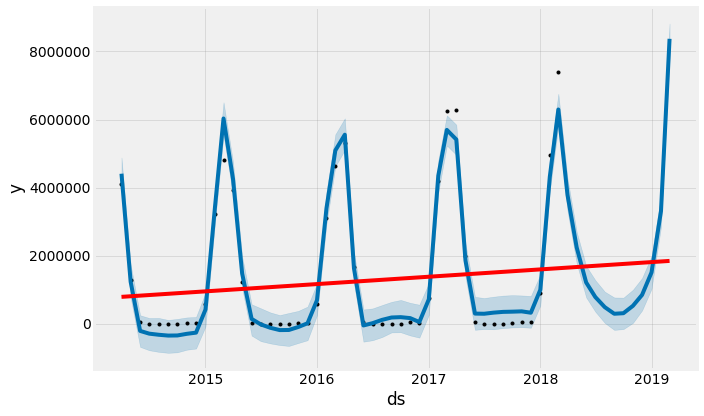

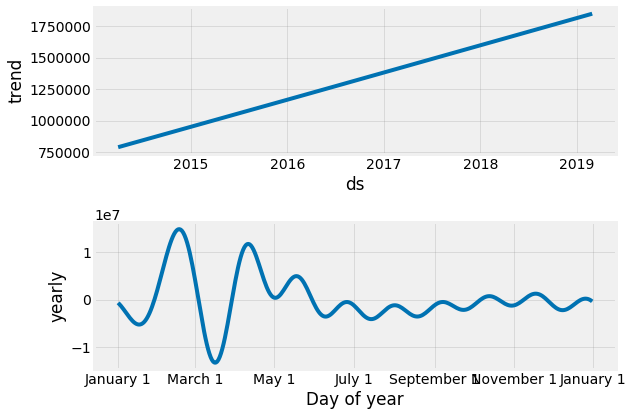

In [290]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [291]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,7.908662e+05,3.976275e+06,4.884567e+06,7.908662e+05,7.908662e+05,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,0.0,0.0,0.0,4.408742e+06
1,2014-05-01,8.084607e+05,7.663605e+05,1.735078e+06,8.084607e+05,8.084607e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,0.0,0.0,0.0,1.234373e+06
2,2014-06-01,8.266417e+05,-6.785855e+05,2.505714e+05,8.266417e+05,8.266417e+05,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,0.0,0.0,0.0,-2.094559e+05
3,2014-07-01,8.442362e+05,-7.780139e+05,1.688357e+05,8.442362e+05,8.442362e+05,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,0.0,0.0,0.0,-2.904294e+05
4,2014-08-01,8.624172e+05,-8.253567e+05,1.712191e+05,8.624172e+05,8.624172e+05,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,0.0,0.0,0.0,-3.229639e+05
5,2014-09-01,8.805982e+05,-8.536492e+05,1.127344e+05,8.805982e+05,8.805982e+05,-1.227368e+06,-1.227368e+06,-1.227368e+06,-1.227368e+06,-1.227368e+06,-1.227368e+06,0.0,0.0,0.0,-3.467702e+05
6,2014-10-01,8.981927e+05,-8.379359e+05,1.433250e+05,8.981927e+05,8.981927e+05,-1.241363e+06,-1.241363e+06,-1.241363e+06,-1.241363e+06,-1.241363e+06,-1.241363e+06,0.0,0.0,0.0,-3.431705e+05
7,2014-11-01,9.163737e+05,-7.618168e+05,1.869002e+05,9.163737e+05,9.163737e+05,-1.211368e+06,-1.211368e+06,-1.211368e+06,-1.211368e+06,-1.211368e+06,-1.211368e+06,0.0,0.0,0.0,-2.949947e+05
8,2014-12-01,9.339682e+05,-7.268273e+05,1.992108e+05,9.339682e+05,9.339682e+05,-1.194435e+06,-1.194435e+06,-1.194435e+06,-1.194435e+06,-1.194435e+06,-1.194435e+06,0.0,0.0,0.0,-2.604672e+05
9,2015-01-01,9.521491e+05,-7.972808e+04,9.151342e+05,9.521491e+05,9.521491e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,-5.344170e+05,0.0,0.0,0.0,4.177321e+05


In [292]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

912703959888.8917


In [293]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.923990e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",3.451102e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",2.976228e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",2.901931e+06,inf
"Alpha=0.005,Beta=0.005,Gamma=0.497,TripleExponentialSmoothing",1.068288e+06,inf
"Alpha=0.6,Beta=1.0,Gamma=0.5,TripleExponentialSmoothing",8.675214e+05,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",3.189849e+13,inf
"SARIMA(0,1,0)(0,1,2)12",1.061537e+12,inf
Prophet,9.127040e+11,NaN


In [294]:
import fbprophet

In [295]:
m = fbprophet.Prophet()

In [296]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [297]:
future = m.make_future_dataframe(periods=365)

In [298]:
forecast = m.predict(future)

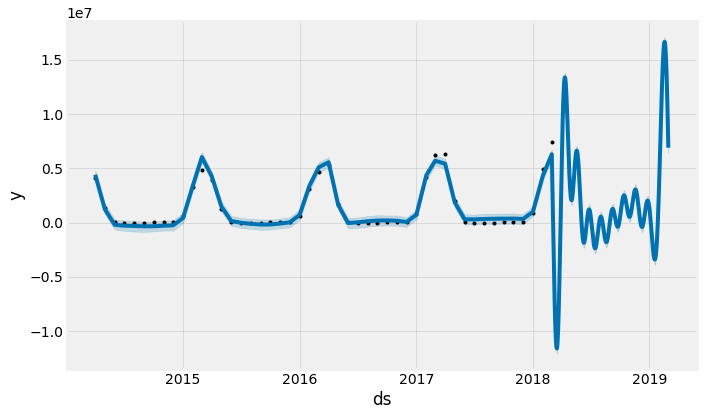

In [299]:
m.plot(forecast);

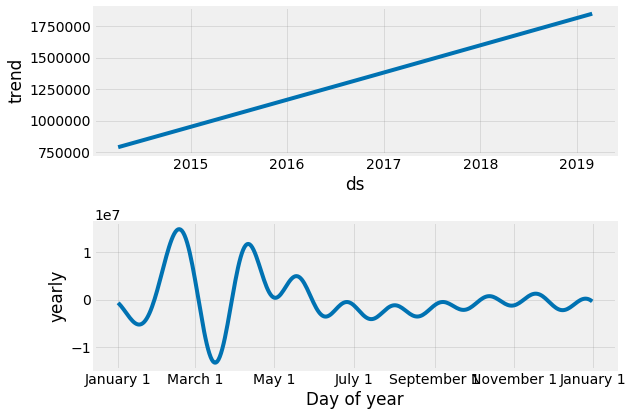

In [300]:
m.plot_components(forecast);

In [301]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,4099496
2014-05-01,2014-05-01,1293194
2014-06-01,2014-06-01,37584
2014-07-01,2014-07-01,0
2014-08-01,2014-08-01,0


In [302]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [303]:
predict=m.predict(future)

In [304]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,7.908662e+05,3.939572e+06,4.878837e+06,7.908662e+05,7.908662e+05,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,3.617876e+06,0.0,0.0,0.0,4.408742e+06
1,2014-05-01,8.084607e+05,7.828576e+05,1.698232e+06,8.084607e+05,8.084607e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,4.259124e+05,0.0,0.0,0.0,1.234373e+06
2,2014-06-01,8.266417e+05,-6.907160e+05,2.618410e+05,8.266417e+05,8.266417e+05,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,-1.036098e+06,0.0,0.0,0.0,-2.094559e+05
3,2014-07-01,8.442362e+05,-7.613199e+05,1.766987e+05,8.442362e+05,8.442362e+05,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,-1.134666e+06,0.0,0.0,0.0,-2.904294e+05
4,2014-08-01,8.624172e+05,-8.053516e+05,1.579102e+05,8.624172e+05,8.624172e+05,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,-1.185381e+06,0.0,0.0,0.0,-3.229639e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,1.845085e+06,1.179206e+07,1.273891e+07,1.844959e+06,1.845212e+06,1.040799e+07,1.040799e+07,1.040799e+07,1.040799e+07,1.040799e+07,1.040799e+07,0.0,0.0,0.0,1.225308e+07
409,2019-02-26,1.845675e+06,1.059955e+07,1.154532e+07,1.845548e+06,1.845802e+06,9.222050e+06,9.222050e+06,9.222050e+06,9.222050e+06,9.222050e+06,9.222050e+06,0.0,0.0,0.0,1.106773e+07
410,2019-02-27,1.846265e+06,9.270665e+06,1.026307e+07,1.846138e+06,1.846393e+06,7.922835e+06,7.922835e+06,7.922835e+06,7.922835e+06,7.922835e+06,7.922835e+06,0.0,0.0,0.0,9.769100e+06
411,2019-02-28,1.846855e+06,7.923835e+06,8.829836e+06,1.846728e+06,1.846983e+06,6.524741e+06,6.524741e+06,6.524741e+06,6.524741e+06,6.524741e+06,6.524741e+06,0.0,0.0,0.0,8.371597e+06


In [305]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,4.408742e+06,3.939572e+06,4.878837e+06
1,2014-05-01,1.234373e+06,7.828576e+05,1.698232e+06
2,2014-06-01,-2.094559e+05,-6.907160e+05,2.618410e+05
3,2014-07-01,-2.904294e+05,-7.613199e+05,1.766987e+05
4,2014-08-01,-3.229639e+05,-8.053516e+05,1.579102e+05


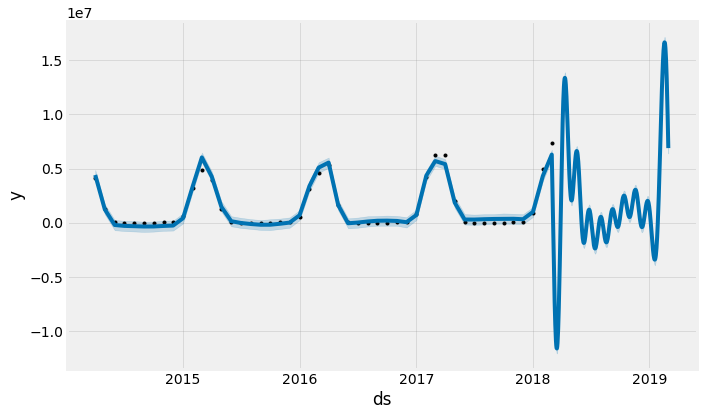

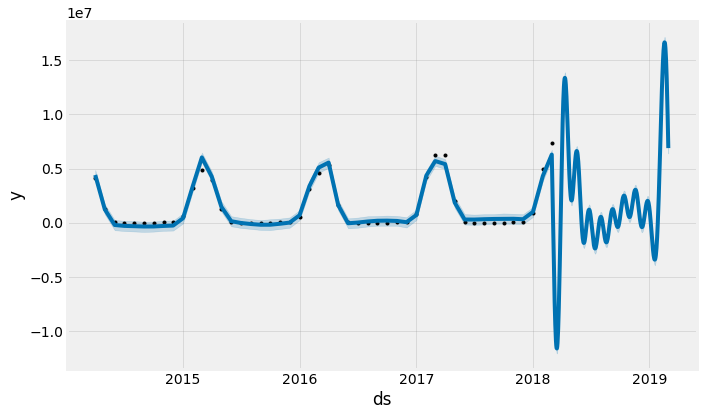

In [306]:
m.plot(predict)

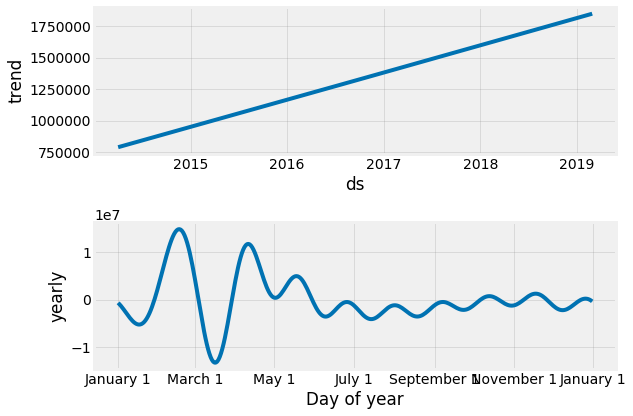

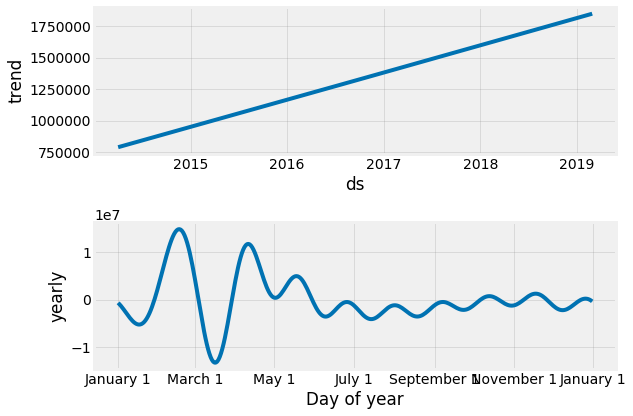

In [307]:
m.plot_components(predict)

In [308]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [309]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,6.027653e+05,5.002697e+05,7.038529e+05,7212,2016-09-02
1,2016-11-01,5.952584e+05,4.868507e+05,6.907505e+05,39169,2016-09-02
2,2016-12-01,3.987593e+05,3.048602e+05,5.047952e+05,36159,2016-09-02
3,2017-01-01,7.027964e+05,5.900788e+05,8.059129e+05,766296,2016-09-02
4,2017-02-01,3.117786e+06,3.015825e+06,3.228550e+06,4191053,2016-09-02


In [310]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,31 days,9.453981e+11,972315.828843,917476.664331,41.387587,0.0
1,60 days,9.226739e+11,960559.156098,897744.694727,7.197123,0.0
2,61 days,1.689823e+11,411074.513254,362793.014315,7.141307,0.5
3,90 days,8.010403e+10,283026.553060,266048.452798,5.056686,0.5
4,92 days,1.275859e+11,357191.697437,357150.115068,8.063744,0.0


model = ARIMA(Ban_Mix['sales'], order=(1,1,2))
try:
    model_fit = model.fit()
except:
    pass
output = model_fit.forecast(12)
yhat = output[0]
print(model_fit.summary())

In [311]:
fullmodel1 = ExponentialSmoothing(Ahm_Coo['sales'],
                                  trend='additive',
                                  seasonal='Additive').fit(smoothing_level=0.6,
                                                                 smoothing_slope=1.0,
                                                                 smoothing_seasonal=0.5)

In [312]:
RMSE_fullmodel1 = metrics.mean_squared_error(Ahm_Coo['sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 374720.3981580549


In [313]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=24)

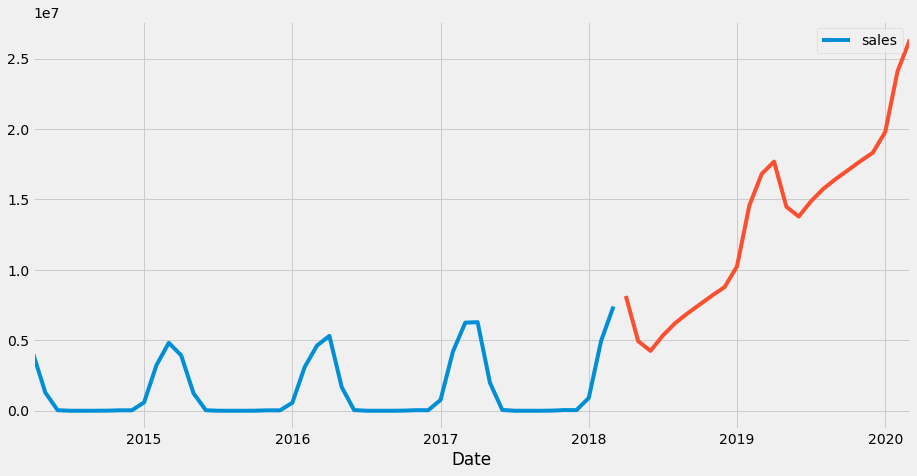

In [314]:
Ahm_Coo.plot()
prediction_1.plot();

In [315]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2018-04-01,7.408240e+06,8.149295e+06,8.890350e+06
2018-05-01,4.201186e+06,4.942242e+06,5.683297e+06
2018-06-01,3.511384e+06,4.252439e+06,4.993494e+06
2018-07-01,4.601544e+06,5.342600e+06,6.083655e+06
2018-08-01,5.484983e+06,6.226038e+06,6.967094e+06


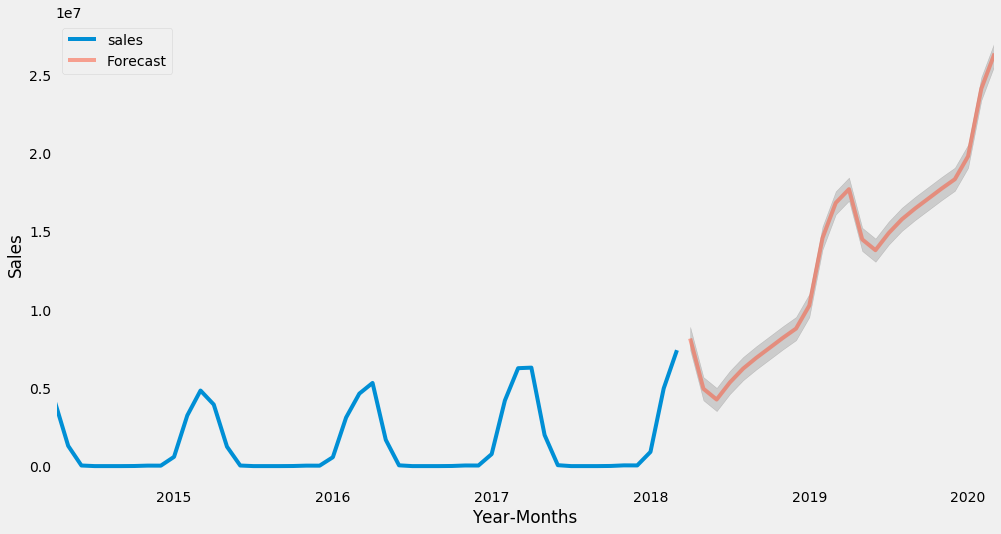

In [316]:
# plot the forecast along with the confidence band

axis = Ahm_Coo.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()